In [37]:
import pandas as pd
df = pd.read_csv('Comment1.csv')

In [38]:
len(df)

149

In [39]:
df

,store_info_id,create_time,score,content
0,341,2022/03/14,999.0,瓦法奇朵。台北車站高cp值火鍋。當月壽星幾歲就送幾隻蝦。麻辣火鍋搭配經典川菜
1,341,2022/03/06,5.0,瓦法奇朵幾歲送幾隻蝦子有夠猛，帶阿公阿嬤來坐著也會笑的火鍋店
2,341,2020/07/24,1.0,不知道下面發說服務態度好的是不是打手，但來這裡吃飯，店員臉臭的不得了，上菜速度慢到極致，點餐...
3,341,2022/02/28,999.0,瓦法奇朵台北車站店 台北車站火鍋推薦台北網美火鍋推薦
4,341,2022/02/20,999.0,瓦法奇朵超有誠意生日壽星優惠！幾歲生日就送幾隻蝦/蛤蜊，cp值爆高
...,...,...,...,...
144,341,2015/06/12,999.0,瓦法奇朵waffogato－你吃過鹹鹹圈嗎？現在還有排餐買一送一喔！(台北車站、邀約)
145,341,2015/04/11,999.0,不過，要一杯飲料的低銷，再加上10%服務費。適合家族，朋友聚餐，但是不適合給單身者消費。
146,341,2015/01/19,999.0,台北車站。瓦法奇朵Waffogato(信陽店)平價好吃
147,341,2014/11/25,999.0,瓦法奇朵(台北車站店)＠牛排買一送一至2/4，輕料理也好吃


In [40]:
df.groupby('store_info_id').count().sort_values(['content'],ascending=False)

,create_time,score,content
store_info_id,,,
341,149,149,147


In [41]:
df1 = df['content']
df1.to_csv('pandas.txt', header=None, index=None, sep='\t')

In [42]:
import jieba
#jieba.load_userdict("dict.txt.big.tw")
jieba.add_word("CP值")
jieba.add_word("必比登")
jieba.add_word("吃到飽")

In [43]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from wordcloud import WordCloud
#from scipy.misc import imread
from collections import Counter
import matplotlib.pyplot as plt

data={}
text_file = open('pandas.txt','r',encoding='utf-8')      #  開啟文件
text_list = text_file.read()

In [45]:
punctuation = set()
with open ('punctuation_zh_tw.txt', 'r',encoding='utf-8') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
with open ('punctuation_en.txt', 'r',encoding='utf-8') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
punctuation.add('\n')
punctuation.add(' ')
print(punctuation)

{'‘', '”', '──', '’', '❤', '）', '{', '_', '…', '～', '"', '—', '~', '...', '@', '？', ' ', ')', '。', '（', '《', '#', '｜', '》', '〕', '(', ';', '–', ':', '\n', ',', '，', '」', '“', '【', '】', '．', '︱', '[', '-', '「', '}', '|', '：', '✖', '*', '！', '』', '.', '!', '/', '、', '〔', '│', '；', ']', "'", '?', '·', '『'}


In [46]:
with open('stopwords_zh_tw.txt',encoding='utf-8') as file:    #加入停用詞表
    stopwords = {line.strip() for line in file}

In [47]:
word_list = [word for word in jieba.cut(text_list, cut_all=False) if word not in punctuation and word not in stopwords]

In [48]:
word_list

['瓦法',
 '奇朵',
 '台北',
 '車站',
 '高',
 'cp',
 '值火鍋',
 '當月壽星',
 '幾歲',
 '送',
 '幾',
 '隻',
 '蝦',
 '麻辣',
 '火鍋',
 '搭配',
 '經典',
 '川菜',
 '瓦法',
 '奇朵',
 '幾歲',
 '送',
 '幾',
 '隻',
 '蝦子',
 '有夠',
 '猛',
 '帶',
 '阿公',
 '阿嬤來',
 '坐',
 '笑',
 '火鍋店',
 '知道',
 '下面',
 '發說',
 '服務態度',
 '是不是',
 '打手',
 '但來',
 '吃',
 '飯',
 '店員臉',
 '臭',
 '不得了',
 '上菜',
 '速度慢',
 '極致',
 '點餐',
 '後',
 '一小',
 '時才',
 '上菜',
 '點火鍋',
 '配料',
 '頻頻',
 '送',
 '錯',
 '餐廳',
 'SOP',
 '菜',
 '再',
 '美味',
 '吃',
 '之前',
 '心情',
 '品嚐',
 '何用',
 '瓦法',
 '奇朵',
 '台北',
 '車站',
 '店',
 '\xa0',
 '\xa0',
 '台北',
 '車站',
 '火鍋',
 '推薦',
 '台北',
 '網美火鍋',
 '推薦',
 '瓦法',
 '奇朵',
 '超有',
 '誠意',
 '生日',
 '壽星',
 '優惠',
 '幾歲',
 '生日',
 '送',
 '幾',
 '隻',
 '蝦',
 '蛤蜊',
 'cp',
 '值',
 '爆高',
 '瓦法',
 '奇朵',
 '當月壽星',
 '好禮',
 '幾歲',
 '送',
 '幾',
 '隻',
 '蝦',
 '北車',
 'CP值',
 '爆',
 '火鍋',
 '+',
 '川菜',
 '+',
 '甜點',
 '麻辣',
 '鍋',
 '+',
 '酸菜',
 '白肉',
 '鍋',
 '紅油',
 '蒜泥',
 '白肉',
 '黑糖',
 '珍珠',
 '爆漿',
 '蛋糕',
 '中西',
 '複',
 '合式',
 '餐廳',
 '台北',
 '車站',
 '周邊',
 '台大',
 '醫院',
 '捷運站',
 '228',
 '公園',
 '聚餐',
 '生日',
 '幾歲',
 '送',


In [49]:
for word in word_list: 
    if len(word)>=2:
        if not data.__contains__(word):
            data[word]=0
        data[word]+=1
data

{'瓦法': 101,
 '奇朵': 105,
 '台北': 117,
 '車站': 97,
 'cp': 4,
 '值火鍋': 1,
 '當月壽星': 2,
 '幾歲': 5,
 '麻辣': 40,
 '火鍋': 54,
 '搭配': 1,
 '經典': 3,
 '川菜': 37,
 '蝦子': 1,
 '有夠': 1,
 '阿公': 1,
 '阿嬤來': 1,
 '火鍋店': 1,
 '知道': 2,
 '下面': 1,
 '發說': 1,
 '服務態度': 1,
 '是不是': 1,
 '打手': 1,
 '但來': 1,
 '店員臉': 1,
 '不得了': 1,
 '上菜': 2,
 '速度慢': 1,
 '極致': 1,
 '點餐': 2,
 '一小': 2,
 '時才': 1,
 '點火鍋': 3,
 '配料': 1,
 '頻頻': 1,
 '餐廳': 21,
 'SOP': 1,
 '美味': 7,
 '之前': 1,
 '心情': 1,
 '品嚐': 3,
 '何用': 1,
 '推薦': 25,
 '網美火鍋': 1,
 '超有': 1,
 '誠意': 1,
 '生日': 3,
 '壽星': 1,
 '優惠': 13,
 '蛤蜊': 1,
 '爆高': 1,
 '好禮': 1,
 '北車': 17,
 'CP值': 16,
 '甜點': 7,
 '酸菜': 1,
 '白肉': 2,
 '紅油': 1,
 '蒜泥': 1,
 '黑糖': 1,
 '珍珠': 1,
 '爆漿': 13,
 '蛋糕': 14,
 '中西': 4,
 '合式': 8,
 '周邊': 2,
 '台大': 1,
 '醫院': 1,
 '捷運站': 2,
 '228': 1,
 '公園': 1,
 '聚餐': 23,
 '痛風壽星': 1,
 '誇餐': 1,
 '低家': 1,
 '免費': 4,
 '等等': 1,
 '東西': 1,
 '還沒上': 1,
 '上來': 1,
 '之後還': 1,
 '全都': 1,
 '上錯': 1,
 '優雅': 1,
 '咖啡': 17,
 '套餐': 18,
 '一送': 43,
 '下午茶': 15,
 '組合': 2,
 '不用': 2,
 '花大錢': 1,
 '廳裡': 4,
 '平日': 3,
 '特定': 1,
 '餐點

In [63]:
all_special_label = pd.read_csv('all_special_label.txt', sep=",",header=None)
all_special_label = all_special_label[0].values.tolist()

special_label = [word for word in word_list if word in all_special_label]
special_label = list(set(special_label))

sql_special_label = ""
for index, i in enumerate(special_label):
  if index == len(special_label)-1:
    sql_special_label += i
  else:
    sql_special_label += i + ","
sql_special_label

'美味,平價,不限時,聚餐'

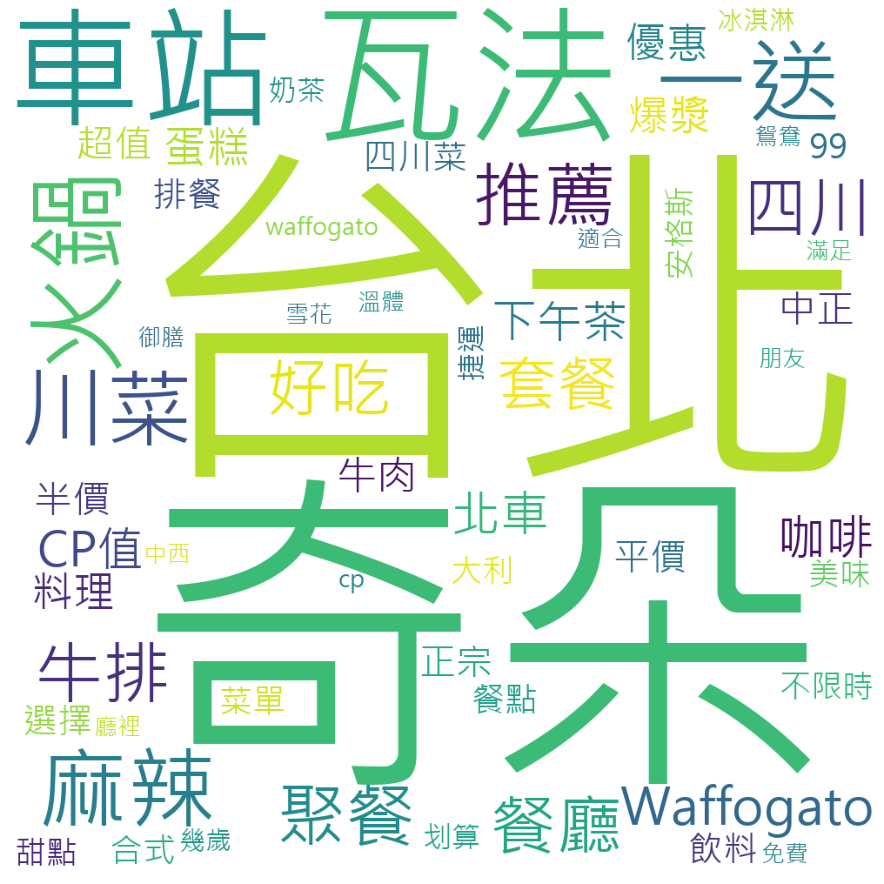

In [51]:
from wordcloud import WordCloud

my_wordcloud = WordCloud(  
    background_color='white',  
    max_words=60,  
    font_path=r'MicrosoftJhengHeiRegular.ttf',   #字體
    width=1000,
    height=1000
).generate_from_frequencies(data)

plt.figure(figsize=(18,16))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()  
my_wordcloud.to_file('result.jpg')
text_file.close()